In [1]:
import numpy as np
import matplotlib.pyplot as plt

# image matrix
X = np.array([[1, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 1, 1, 0, 0],
              [0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]])

# write a function that will display the image
def plot_img(x, im_shape=(6, 6)):
    plt.imshow(x.reshape(im_shape), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.gcf().set_size_inches(4, 4)

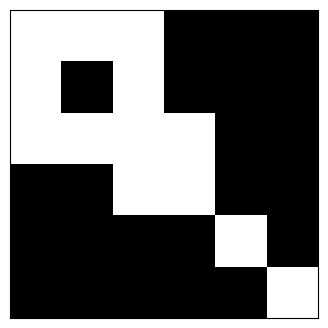

In [2]:
# cmap apparently maps 0 to black and 1 to white, which is opposite of the notes
# but not a big deal, still the same idea
plot_img(X)

In [3]:
# sharpening kernel
W = np.array([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]])

# convolution function (Simplified for square images/kernels only)
def convMat(X, W):
    # get the dimensions of the kernel and input
    k, _ = W.shape
    p, _ = X.shape

    # calculate the dimensions of the output matrix
    q = p - k + 1
    G = np.zeros((q, q))

    # do the thing
    for m in range(q):
        for n in range(q):
            submatrix = X[m:m+k, n:n+k]
            G[m, n] = np.sum(W * submatrix)
    
    return G

G = convMat(X, W)
G

array([[-4.,  3., -2.,  0.],
       [ 3.,  1.,  3., -1.],
       [-2.,  3.,  3., -2.],
       [ 0., -1., -2.,  5.]])

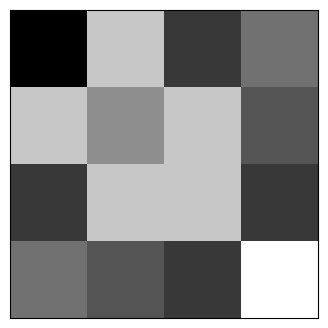

In [4]:
# convoluted image
plot_img(G, im_shape=G.shape)

In [5]:
# note (for future reference) that the plot_img function takes a vector
# images will be stored in a matrix where each row is a flattened image:
X.flatten()

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

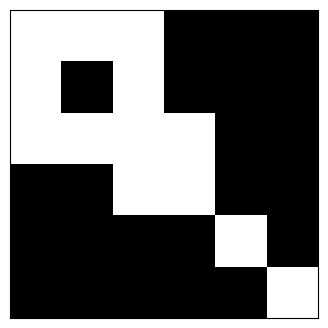

In [6]:
plot_img(X.flatten())

In [7]:
# I started running into PATH and DLL errors when I tried to update/re-install keras
# and tensorflow on my local machine, so the examples using the default python libraries
# for CNNs will be presented using Google Colab and the cnn_keras_colab.ipynb file